# <center>TP Nro 2: Aplicaciones de la DFT 1C </center>
### Integrantes: Franco Areco - Ezequiel Di Laudo - Luna Isaías


Librerías usadas:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from dsp_tp2 import *

## <u>Ejercicio 1</u>:
Generar una señal discreta, a partir de una señal $x(t)$, de un 1 segundo de duración, compuesta por
tres funciones $x_1(t)+ x_2(t) + x_3(t)$ como se definen a continuación:

$x_1 (t) = 2$ <br>
$x_2 (t) = cos(2 \pi f_2 t) e^{- \frac{(t-\mu_2)^2}{2\sigma_2^2}}\;\;\;\;\;\;\;\;f_2 = 10kHz$ $\mu_2 = 0.2s$ $\sigma_2 = 0.05s$<br> 
$x_3 (t) = sen(2 \pi f_3 t) e^{- \frac{(t-\mu_3)^2}{2\sigma_3^2}}\;\;\;\;\;\;\;\;f_3 = 10.1kHz$ $\mu_3 = 0.7s$ $\sigma_3 = 0.07s$<br>


En todos los casos, la frecuencia de muestreo es <b>$f_s = 44.1$kHz </b>. Graficar cada señal por separado y
la señal total.

Graficar la magnitud (en escala lineal y en dB) y la fase de la transformada de Fourier (DFT) de la
señal total. Indicar qué representan las componentes no nulas. El eje de frecuencia debe estar en Hz.

In [10]:
## Definción de constantes
T = 1
sr = 44100    
t = np.linspace(0,T,sr)
freq2 = 10000        
u2 = 0.2          
s2 = 0.05
freq3 = 10100
u3 = 0.7
s3 = 0.07
amplitud1 = 2

#Funcion x1
x1 = amplitud1*np.ones_like(t)

#Funcion x2
val1 = np.cos((np.pi)*2*freq2*t)
val2 = np.exp(-((t-u2)**2)/(2*(s2**2)))
x2 = val1*val2

#Funcion x3
val3 = np.sin((np.pi)*2*freq3*t)             
val4 = np.exp((-1)*((t-u3)**2)/(2*(s3**2)))    
x3 = val3*val4

       
#función suma
signal1 = x1+x2+x3

#función dB
x_dB = 20*np.log(signal1/abs(np.max(signal1)))

### FFT

In [11]:
dft_signal1 = np.fft.fft(signal1)
freq = np.fft.fftfreq(len(t), 1/sr)

#### Plot

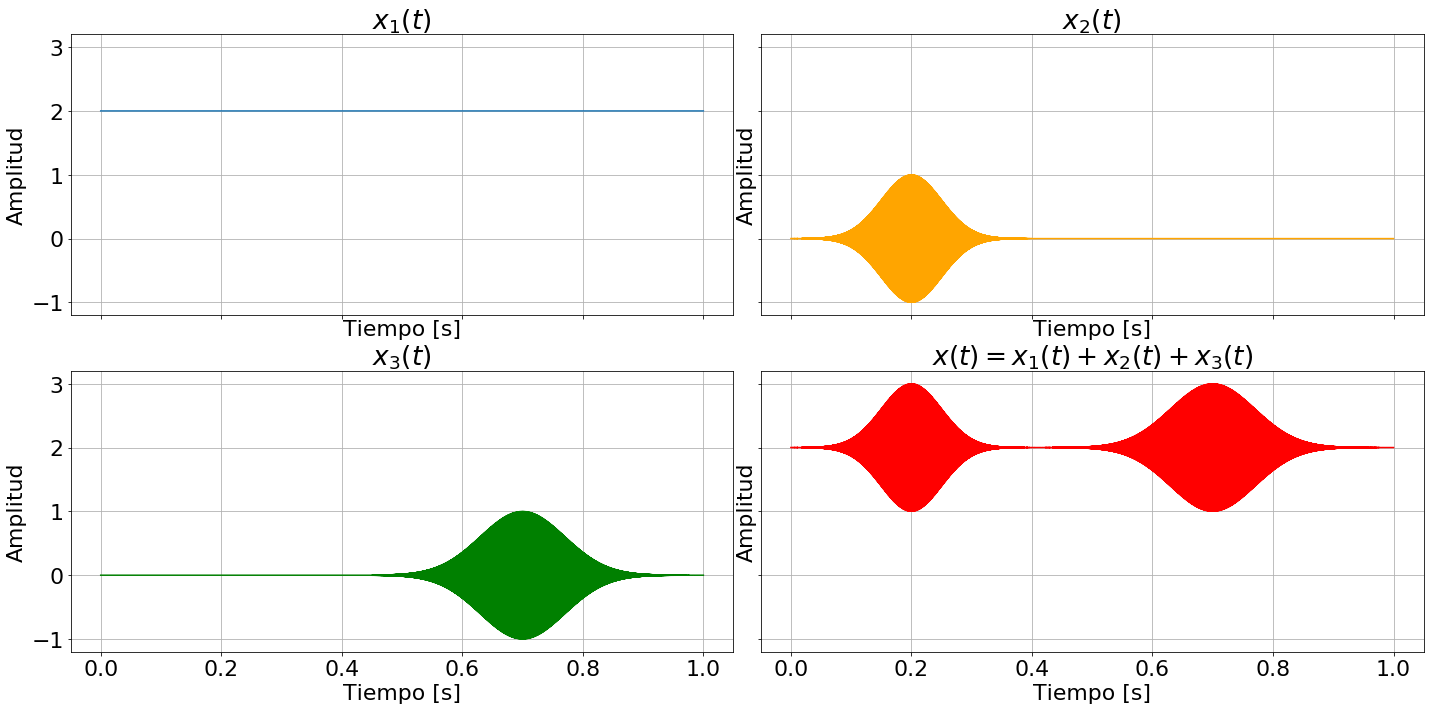

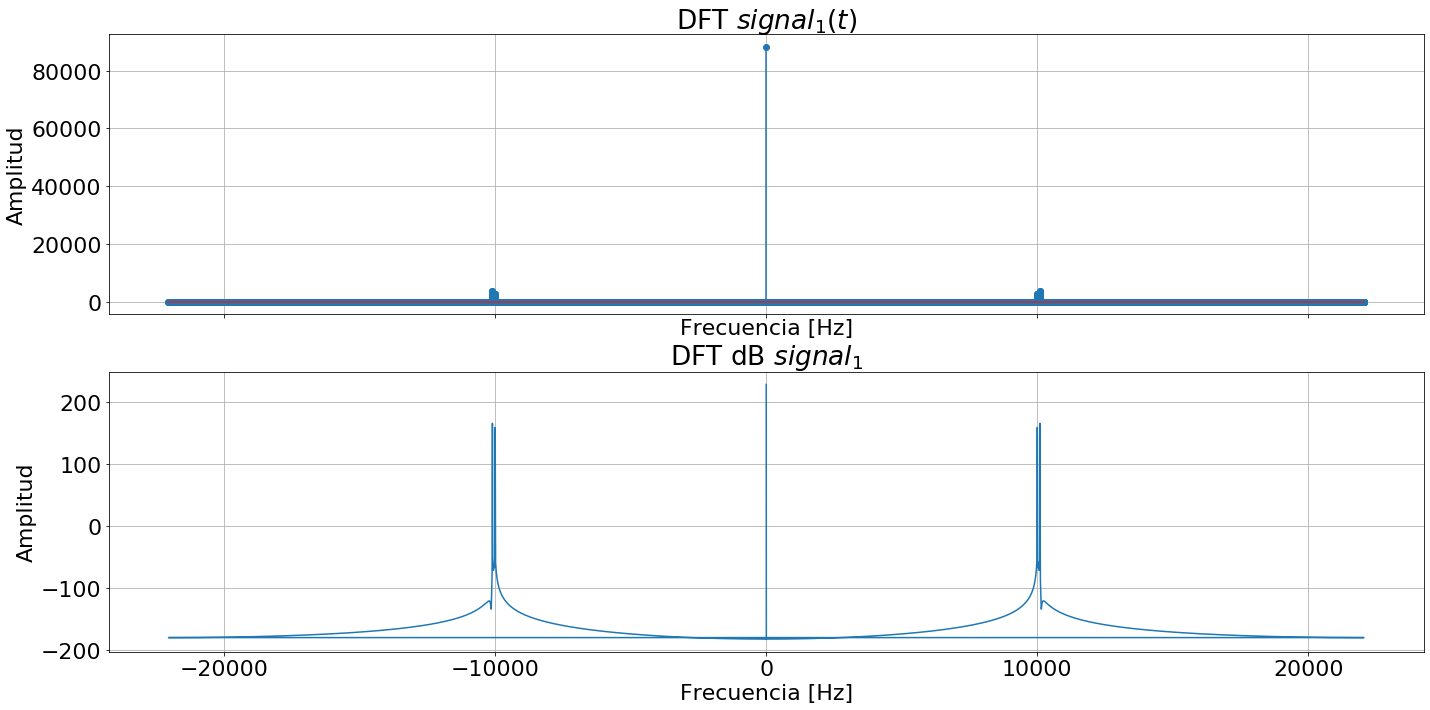

In [13]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[20, 10])
axs[0, 0].plot(t, x1)
axs[0, 0].set_title('$x_1(t)$')
axs[0, 1].plot(t, x2, color='orange')
axs[0, 1].set_title('$x_2(t)$')
axs[1, 0].plot(t, x3, color='green')
axs[1, 0].set_title('$x_3(t)$')
axs[1, 1].plot(t, signal1, color='red')
axs[1, 1].set_title('$x(t) = x_1(t) + x_2(t) + x_3(t)$')
fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[1].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[2].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[3].set(ylabel='Amplitud', xlabel='Tiempo [s]')

for ax in axs.flat:
    ax.grid()
        

plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(2, 1, sharex=True, sharey=False, figsize=[20, 10])
axs[0].stem(freq, abs(dft_signal1),use_line_collection= "True")
axs[0].set_title('DFT $signal_1(t)$')
axs[1].plot(freq, 20*np.log(abs(dft_signal1)))
axs[1].set_title('DFT dB $signal_1$')
fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud', xlabel='Frecuencia [Hz]')
axs.flat[1].set(ylabel='Amplitud', xlabel='Frecuencia [Hz]')

for ax in axs.flat:
    ax.grid()
   

## <u>Ejercicio 2</u>:
La señal del inciso 1 se modificará cambiando la frecuencia de x3(t), siendo el nuevo valor $f3= 10008.37 \thinspace Hz$, y además se le sumará una componente de ruido aleatorio (normal) $r(t)$, quedando la señal total $x1(t)+x2(t)+x3(t)+ r(t)$, también de 1 segundo de duración y muestreada a Fs=44.1 kHz:

Graficar la magnitud transformada de Fourier (DFT) de la señal total utilizando tres ventanas diferentes: Rectangular, Hann y Blackman. La señal debe multiplicarse por la ventana antes del cálculo de la DFT. Además, graficar en escala de dB la DFT de cada una de las ventanas, y comparar el ancho del lóbulo principal y la atenuación. Determinar cuál ventana elegirían para
diferenciar las componentes de frecuencia (10000 y 10008.37 Hz) y por qué. ¿Cambiarían algún otro parámetro en el cálculo de la DFT para mejorar la resolución?

In [14]:
freq3_bis = 10008.37

#Funcion x3
val3bis = np.sin((np.pi)*2*freq3_bis*t)             
val4 = np.exp((-1)*((t-u3)**2)/(2*(s3**2)))    
x3bis = val3bis*val4

#Generación de ruido
noise = np.random.normal(0 , 0.01 , T*sr)

#Funciones sumadas
signal2 = x1 + x2 + x3bis + noise




### Creación de las ventanas

In [15]:
window_len= 44100 #ancho de la ventana 

#Ventana rectangular 
w_rectangular= np.ones(window_len)

#Ventana de Hann
w_hann = hann(window_len)

#Ventana de Blackman
w_blackman = blackman(window_len)


### Proceso:
#### Multiplicación de las ventanas con la señal:

In [16]:
signal2_rectangular = signal2 * w_rectangular
signal2_hann = signal2 *  w_hann
signal2_blackman = signal2 * w_blackman

#### Cálculo de las dft

In [17]:
dft_signal2 = np.fft.fft(signal2)
freq_signal2 = np.fft.fftfreq(len(signal2), 1/sr)

dft_signal2_rectangular = np.fft.fft(signal2_rectangular)
dft_signal2_hann = np.fft.fft(signal2_hann)
dft_signal2_blackman = np.fft.fft(signal2_blackman)

#### Plot

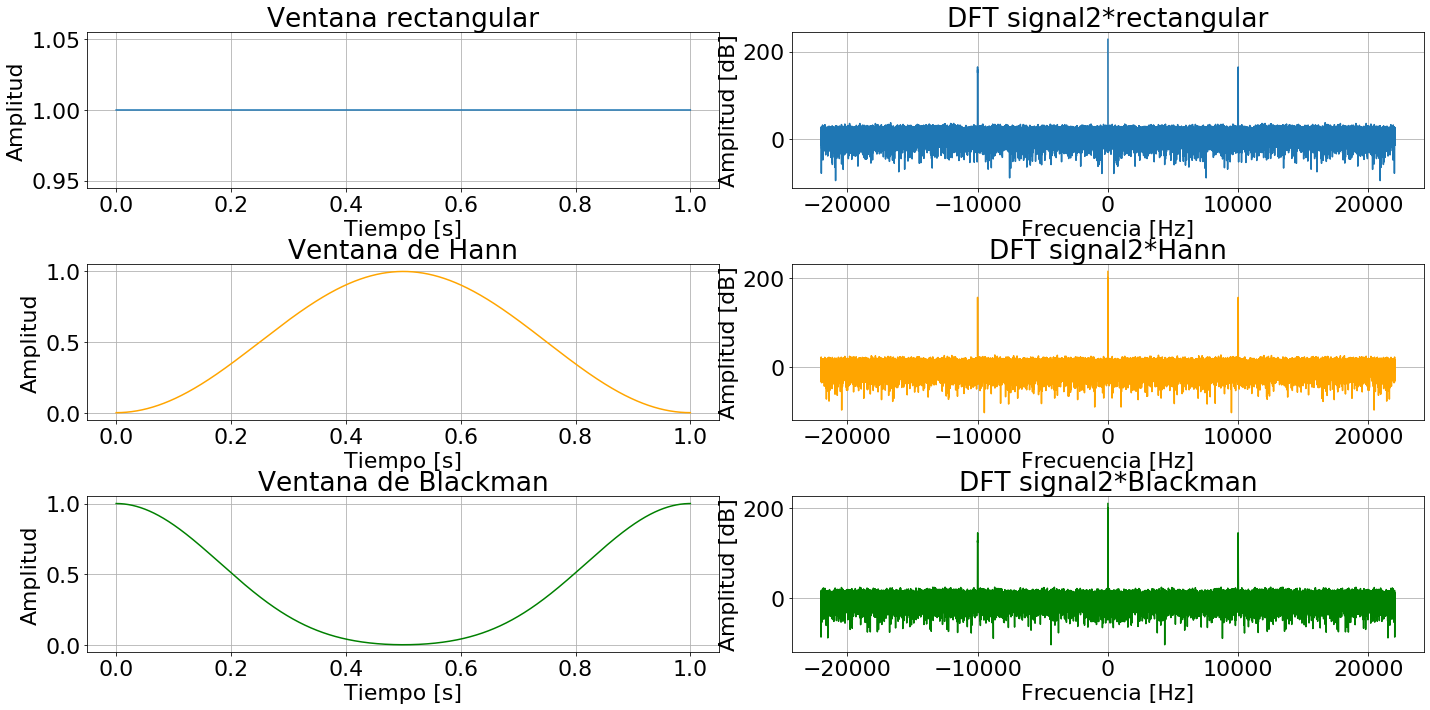

In [18]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(3, 2, sharex=False, sharey=False, figsize=[20, 10])
axs[0, 0].plot(t, w_rectangular )
axs[0, 0].set_title('Ventana rectangular')
axs[1, 0].plot(t, w_hann, color='orange')
axs[1, 0].set_title('Ventana de Hann')
axs[2, 0].plot(t, w_blackman, color='green')
axs[2, 0].set_title('Ventana de Blackman')
axs[0, 1].plot(freq_signal2, 20*np.log(abs(dft_signal2_rectangular)))
axs[0, 1].set_title('DFT signal2*rectangular')
axs[1, 1].plot(freq_signal2, 20*np.log(abs(dft_signal2_hann)), color='orange')
axs[1, 1].set_title('DFT signal2*Hann')
axs[2, 1].plot(freq_signal2, 20*np.log(abs(dft_signal2_blackman)), color='green')
axs[2, 1].set_title('DFT signal2*Blackman')
fig.tight_layout()

axs[0, 0].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs[1, 0].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs[2, 0].set(ylabel='Amplitud', xlabel='Tiempo [s]')

axs[0, 1].set(ylabel='Amplitud [dB]', xlabel='Frecuencia [Hz]')
axs[1, 1].set(ylabel='Amplitud [dB]', xlabel='Frecuencia [Hz]')
axs[2, 1].set(ylabel='Amplitud [dB]', xlabel='Frecuencia [Hz]')

for ax in axs.flat:
    ax.grid()
        

### Conclusión: 


## <u>Ejercicio 3</u>:
Ahora, nos quedaremos con la componente x3(t) del inciso anterior para implementar una
interpolación que mejore la resolución en frecuencia del máximo de la DFT. La señal será entonces
de 1 segundo de duración y muestreada a Fs = 44.1 kHz:

$x_3 (t) = sen(2 \pi f_3 t) e^{- \frac{(t-\mu_3)^2}{2\sigma_3^2}}\;\;\;\;\;\;\;\;f_3 = 100008.3 Hz$ $\mu_3 = 0.7s$ $\sigma_3 = 0.07s$<br>

Se deberá graficar la magnitud, expresada en dB, de la DFT de la señal x3(t) y se determinará la
frecuencia a la que se detecta el máximo de la magnitud, verificándose que no es la frecuencia
exacta. En casos como este, en donde la resolución no es suficiente para discriminar el valor de una
componente de frecuencia, se puede mejorar la determinación de la posición mediante técnicas de
interpolación. Una de las más simples, pero efectivas, es utilizar la interpolación cuadrática [1] que
se calcula con la siguiente ecuación:

$\eta'_{max}= \eta_{max} + \frac{\alpha- \gamma}{2(\alpha-2\beta+ \gamma)}$

En donde

$n_{max}$ : posición encontrada del punto máximo.

$\beta$= g[$n_{max}$] valor absoluto de la magnitud en dB en la posición máxima nmax del pico.

$\alpha$= g[$n_{max}$-1] valor absoluto de la magnitud en dB en la posición anterior al máximo del pico.

$\gamma$= g[$n_{max}$+1] valor absoluto de la magnitud en dB en la posición posterior al máximo del pico.

<u>Nota:</u> esta ecuación está definida para un intervalo unitario (muestreo o resolución). Si dicho valor no es 1,
debe multiplicarse el valor correspondiente al segundo sumando de la ecuación.


### DFT

In [19]:
dft_signal3 = np.fft.fft(x3bis)

#### Plot

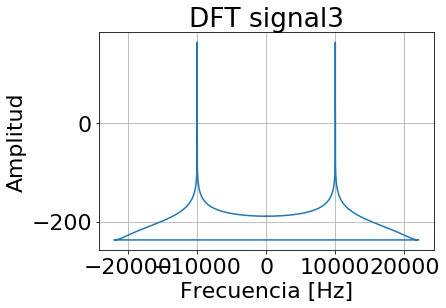

In [25]:
plt.plot(freq, 20*np.log(abs(dft_signal3)))
plt.title('DFT signal3')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid()